Requirements:
pandas, numpy, xgboost, sklearn.model_selection, sklearn.metrics, matplotlib, matplotlib.pyplot

In [1]:
import pandas as pd
import numpy as np
header = ['col'+str(i) for i in range (1,41)] #note that according to criteo, the first column in the dataset is Click Through (CT). Consist of 40 columns 
file = '/home/jupyterlab-data/day_15.gz'

In [2]:
first_row_taken = 100_000 #change this number if you have high compute capabilites. 2834692 is number of max row.
import gzip
with gzip.open(file) as f:
    df = pd.read_csv(f, nrows=first_row_taken, delimiter='\t', names=header)
df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40
0,0,2.0,9.0,NaN,1.0,NaN,0.0,0.0,3,1,...,1f7fc70b,b8170bba,9512c20b,31a9f3b3,228aee9b,b74c6548,59f9dd38,165fbf32,0b3c06d0,2ccea557
1,0,12.0,166.0,3.0,3.0,NaN,1.0,0.0,1,3,...,d20856aa,b6bc86c5,108a0699,e7ef7c20,113b1789,670bb82a,0c427c16,fc6fc912,991321ea,2997ef88
2,0,1.0,66.0,NaN,NaN,NaN,NaN,NaN,2,0,...,753da5f3,b8170bba,9512c20b,1a0af648,13b96cbc,3f2bae22,209c86ee,165fbf32,ff654802,2ccea557
3,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,...,1f7fc70b,b8170bba,7a7178b2,0da1444b,cf12754e,af22e988,c483d0dd,75350c8a,57e36578,ed10571d
4,0,2.0,NaN,4.0,4.0,NaN,7.0,0.0,59,4,...,d20856aa,a1eb1511,9512c20b,44fa1260,c59d0ef0,c41079d6,38d2af52,37dcf7a2,ff654802,b757e957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,NaN,12.0,1.0,12.0,2.0,2.0,0.0,14,13,...,NaN,b8170bba,108a0699,47849e55,73b3f46d,d994ba60,NaN,d6402930,ff654802,2ba8d787
99996,0,16.0,469.0,1.0,NaN,NaN,0.0,0.0,3,4,...,1f7fc70b,b8170bba,9512c20b,NaN,NaN,NaN,30254c7c,03981cd4,30436bfc,962813c6
99997,0,62.0,NaN,15.0,10.0,NaN,2.0,0.0,44,15,...,753da5f3,c013b6d8,9512c20b,41935a2d,ee98fbde,25155378,d44316a9,952e3dcc,30436bfc,2ccea557
99998,0,4.0,145.0,0.0,11.0,4.0,0.0,0.0,0,5,...,d20856aa,b8170bba,9512c20b,716a2217,58a40903,8fddd30c,8d712e6a,ba3a41e9,57e36578,962813c6


In [3]:
df.dtypes

col1       int64
col2     float64
col3     float64
col4     float64
col5     float64
col6     float64
col7     float64
col8     float64
col9       int64
col10      int64
col11    float64
col12    float64
col13    float64
col14    float64
col15     object
col16     object
col17     object
col18     object
col19     object
col20     object
col21     object
col22     object
col23     object
col24     object
col25     object
col26     object
col27     object
col28     object
col29     object
col30     object
col31     object
col32     object
col33     object
col34     object
col35     object
col36     object
col37     object
col38     object
col39     object
col40     object
dtype: object

In [4]:
#Hashing is required before calling function XGBoost_Learning_Curves. hashing is required to convert set of object into set of integer. 
def obj_to_int(self):
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
df = obj_to_int(df)
df

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col31_int,col32_int,col33_int,col34_int,col35_int,col36_int,col37_int,col38_int,col39_int,col40_int
0,0,2.0,9.0,NaN,1.0,NaN,0.0,0.0,3,1,...,-6786298117590501611,608026369886392506,7998368857352231487,-7857207543624255208,-134510415182997345,-2589046559927188899,291757067804014086,-1635697982987954128,4204588330443980942,-4479122987507316519
1,0,12.0,166.0,3.0,3.0,NaN,1.0,0.0,1,3,...,1023377126489191828,-2748936880079184797,-6627300455814296266,4933228779707821342,-5547818946317028565,8268352356256783144,8766716987805390346,-8244104970934697757,-6826574576269775726,-4768364378715190338
2,0,1.0,66.0,NaN,NaN,NaN,NaN,NaN,2,0,...,-766175747691390992,608026369886392506,7998368857352231487,-3219550063547057274,-2533719000212486544,907871109351973992,9172728835552949524,-1635697982987954128,-2609034461261845066,-4479122987507316519
3,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2,1,...,-6786298117590501611,608026369886392506,4900044467829528413,2159193673798810080,-8337133706699990123,4995048061888159396,3670043334111737861,-5107223488947115307,6603538237061601361,2126519403089810114
4,0,2.0,NaN,4.0,4.0,NaN,7.0,0.0,59,4,...,1023377126489191828,-7062526792622367118,7998368857352231487,-3882446622948023021,8201482110501150921,-1854617650358313654,-3487275657372053711,-5233614572117042278,-2609034461261845066,-2389442219535448257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,NaN,12.0,1.0,12.0,2.0,2.0,0.0,14,13,...,0,608026369886392506,-6627300455814296266,4546791814175738593,4493417907717863333,2800278133099273738,0,5404305494730225919,-2609034461261845066,-5369242590013060886
99996,0,16.0,469.0,1.0,NaN,NaN,0.0,0.0,3,4,...,-6786298117590501611,608026369886392506,7998368857352231487,0,0,0,-1135232156802962545,3757581395603766335,5207411557522566040,3939232723672338059
99997,0,62.0,NaN,15.0,10.0,NaN,2.0,0.0,44,15,...,-766175747691390992,6373861910300428763,7998368857352231487,4413707852989377482,3757288295516827864,5615082384834545152,-2137484799203297916,-6164466830624224731,5207411557522566040,-4479122987507316519
99998,0,4.0,145.0,0.0,11.0,4.0,0.0,0.0,0,5,...,1023377126489191828,608026369886392506,7998368857352231487,2362396578701178730,6241891625206138846,8699275858680850884,-9023265411785235594,-7543880047322677158,6603538237061601361,3939232723672338059


In [5]:
df.dtypes

col1           int64
col2         float64
col3         float64
col4         float64
col5         float64
col6         float64
col7         float64
col8         float64
col9           int64
col10          int64
col11        float64
col12        float64
col13        float64
col14        float64
col15_int      int64
col16_int      int64
col17_int      int64
col18_int      int64
col19_int      int64
col20_int      int64
col21_int      int64
col22_int      int64
col23_int      int64
col24_int      int64
col25_int      int64
col26_int      int64
col27_int      int64
col28_int      int64
col29_int      int64
col30_int      int64
col31_int      int64
col32_int      int64
col33_int      int64
col34_int      int64
col35_int      int64
col36_int      int64
col37_int      int64
col38_int      int64
col39_int      int64
col40_int      int64
dtype: object

Accuracy: 97.11%


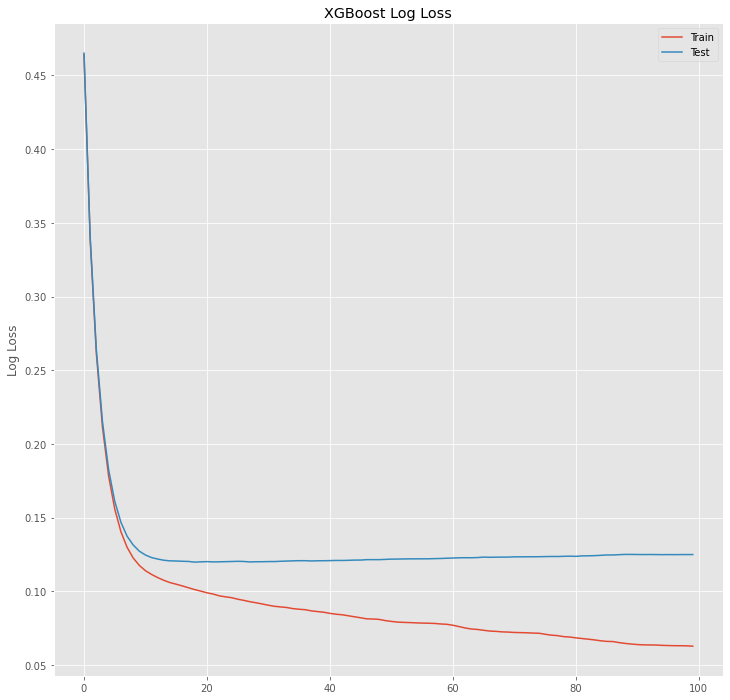

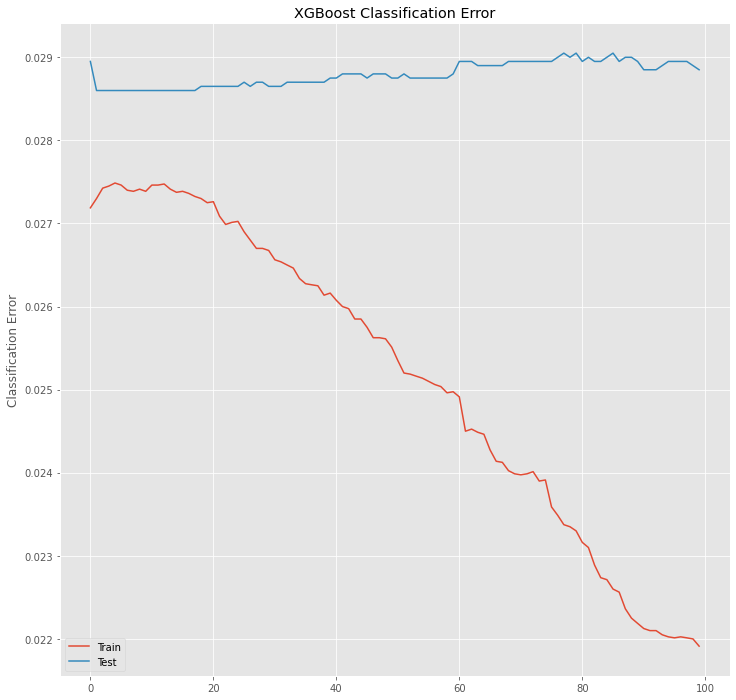

In [6]:
def XGBoost_Learning_Curves(dataf): 
    import warnings
    warnings.filterwarnings("ignore")
    
    # load libraries
    from numpy import loadtxt
    from xgboost import XGBClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from matplotlib import pyplot
    import matplotlib.pyplot as plt    
    
    plt.style.use('ggplot')    
      
    # split data into X and y
    X = dataf.loc[:, dataf.columns != 'col1']
    Y = dataf.loc[:, dataf.columns == 'col1']
    
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    
    # fit model no training data
    model = XGBClassifier()
    eval_set = [(X_train, y_train), (X_test, y_test)]
    model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=False)
    
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['error'])
    x_axis = range(0, epochs)
    
    # plot log loss
    fig, ax = pyplot.subplots(figsize=(12,12))
    ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
    ax.legend()
    
    pyplot.ylabel('Log Loss')
    pyplot.title('XGBoost Log Loss')
    pyplot.show()
    
    # plot classification error
    fig, ax = pyplot.subplots(figsize=(12,12))
    ax.plot(x_axis, results['validation_0']['error'], label='Train')
    ax.plot(x_axis, results['validation_1']['error'], label='Test')
    ax.legend()
    
    pyplot.ylabel('Classification Error')
    pyplot.title('XGBoost Classification Error')
    pyplot.show()

XGBoost_Learning_Curves(df)

Data Source: https://labs.criteo.com/2013/12/download-terabyte-click-logs/

Project Inspiration:https://towardsdatascience.com/mobile-ads-click-through-rate-ctr-prediction-44fdac40c6ff

Mapping object to set of Integer wiht Hash Function, before using it in XGBoost: https://booking.ai/dont-be-tricked-by-the-hashing-trick-192a6aae3087

Regularization, Variance, OverFit Concept: https://www.youtube.com/watch?v=Q81RR3yKn30

XGBoost_Playlist by StatQuest: https://www.youtube.com/watch?v=OtD8wVaFm6E&list=PLblh5JKOoLULU0irPgs1SnKO6wqVjKUsQ

Visulazing XGBClassifier with val_metric Error & LogLoss: https://setscholars.net/wp-content/uploads/2019/02/visualise-XgBoost-model-with-learning-curves-in-Python.html